In [1]:
import pandas as pd
import numpy as np
import nltk
from pathlib import Path
import dtale
import pprint
from matplotlib import pyplot as plt
import matplotlib

In [2]:
df1 = pd.read_csv("./oesch16_nur/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch16_nur/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch16_nur/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
#df = df[df.combi_model=="nn"]
#df = df[df.combi_model=="xgboost"]
#df = df[df.combi_model=="linear"]
df.head(12)

,Name,combi_model,confidence average @0.0.validation accuracy @0.0:,confidence average @0.5.percentage labelled @0.5:,confidence average @0.55.percentage labelled @0.55:,confidence average @0.6.percentage labelled @0.6:,confidence average @0.65.percentage labelled @0.65:,confidence average @0.7.percentage labelled @0.7:,confidence average @0.75.percentage labelled @0.75:,confidence average @0.8.percentage labelled @0.8:,...,confidence average @0.98.validation accuracy @0.98:,confidence average @0.99.validation accuracy @0.99:,confidence average @0.992.validation accuracy @0.992:,confidence average @0.994.validation accuracy @0.994:,confidence average @0.995.validation accuracy @0.995:,confidence average @0.996.validation accuracy @0.996:,confidence average @0.997.validation accuracy @0.997:,confidence average @0.998.validation accuracy @0.998:,confidence average @0.999.validation accuracy @0.999:,confidence average @0.0.percentage labelled @0.0:
0,"""real_third""",nn,0.855197,0.999013,0.990163,0.979303,0.970433,0.959603,0.944153,0.928720,...,0.935387,0.944643,0.949220,0.953723,0.954923,0.962330,0.962303,0.966060,0.715500,1.0
1,"""third""",nn,0.865667,0.997000,0.984333,0.973000,0.957667,0.945333,0.929333,0.915000,...,0.940667,0.949333,0.949667,0.954333,0.957667,0.960667,0.962333,0.969000,0.696000,1.0
2,"""second""",nn,0.853000,0.997333,0.989000,0.979667,0.970333,0.958667,0.945667,0.927000,...,0.935667,0.941000,0.944333,0.946000,0.946333,0.951667,0.956667,0.962667,0.865667,1.0
3,"""best""",nn,0.854667,0.998333,0.986333,0.975000,0.966333,0.956000,0.939333,0.921667,...,0.941333,0.951000,0.951667,0.953667,0.955000,0.958000,0.966333,0.966333,0.719000,1.0
0,"""real_third""",xgboost,0.841080,0.999670,0.998680,0.996383,0.991453,0.989157,0.984553,0.977660,...,0.905697,0.917303,0.919920,0.926613,0.930757,0.933170,0.938790,0.941963,0.942190,1.0
1,"""third""",xgboost,0.845333,1.000000,0.999667,0.998000,0.995333,0.993667,0.983667,0.973667,...,0.919667,0.926333,0.928000,0.931667,0.932667,0.937000,0.938333,0.941667,0.945333,1.0
2,"""second""",xgboost,0.842667,1.000000,0.998667,0.997333,0.995667,0.993333,0.988667,0.978667,...,0.901000,0.910333,0.913333,0.921667,0.924667,0.930333,0.935333,0.938333,0.940333,1.0
3,"""best""",xgboost,0.841333,1.000000,0.996000,0.993667,0.989000,0.984000,0.979667,0.973000,...,0.906333,0.916000,0.920667,0.929333,0.933333,0.936667,0.941333,0.943333,0.947667,1.0
0,"""real_third""",linear,0.851250,0.993763,0.978987,0.960593,0.947443,0.930043,0.905097,0.876860,...,0.957250,0.964923,0.960170,0.968403,0.982160,0.990953,0.233333,0.000000,0.000000,1.0
1,"""third""",linear,0.860333,0.991333,0.976000,0.959333,0.938667,0.921667,0.901333,0.873333,...,0.954667,0.958000,0.964000,0.978333,0.989000,0.993667,0.100000,0.000000,0.000000,1.0


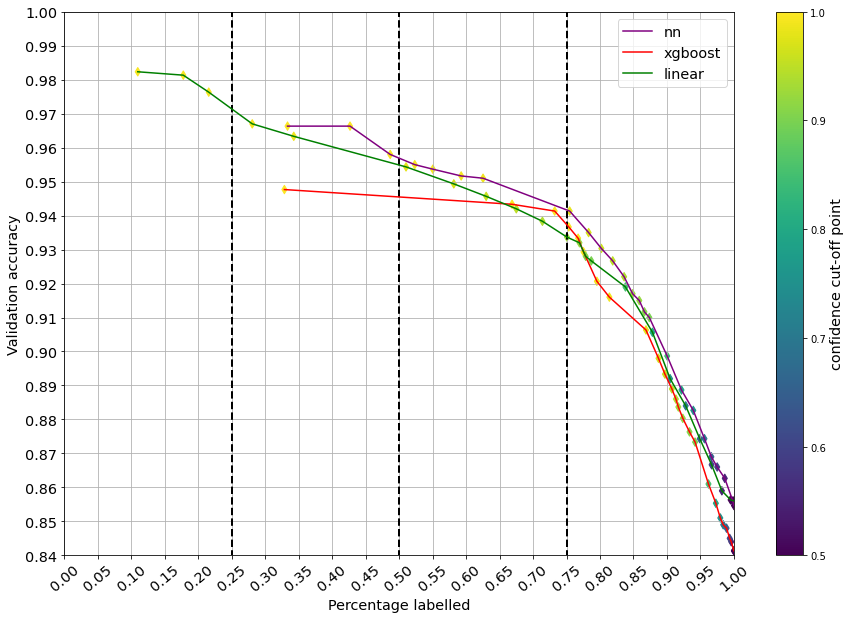

In [23]:
df1 = pd.read_csv("./oesch16_nur/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch16_nur/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch16_nur/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

#df = df[df.combi_model=="nn"] # hier third bestes
#df = df[df.combi_model=="xgboost"] # hier third bestes, aber später best bestes
#df = df[df.combi_model=="linear"] # hier third bestes

df = df[df['Name'] == '"best"'] # laut optimization bestes modell
#df = df[df['Name'] == '"second"']
#df = df[df['Name'] == '"third"']
#df = df[df['Name'] == '"real_third"']


names = df.Name.values
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<(max-0.01):
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


plt.figure(figsize= (15,10))
for perc, acc, name, combi_mod, linecolor in zip(percentages, accuracies, names, combi_model, colors):
    #print(percentages)
    #for i, j, k in zip(perc, acc, confidences):
    plt.scatter(x=perc, y=acc, c=confidences, vmin=0.5, vmax=1.0, marker = "d")
    plt.plot(perc, acc, c=linecolor,  label = f"{combi_mod}")
cbar = plt.colorbar()
cbar.set_label('confidence cut-off point')

plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((0.84, 1.0))
plt.grid()
plt.yticks(np.arange(0.84, 1.0, step=0.01))
plt.xticks(np.arange(0, 1.025, step=0.05))
plt.xlabel("Percentage labelled")
plt.ylabel("Validation accuracy")
plt.legend()
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
plt.show()

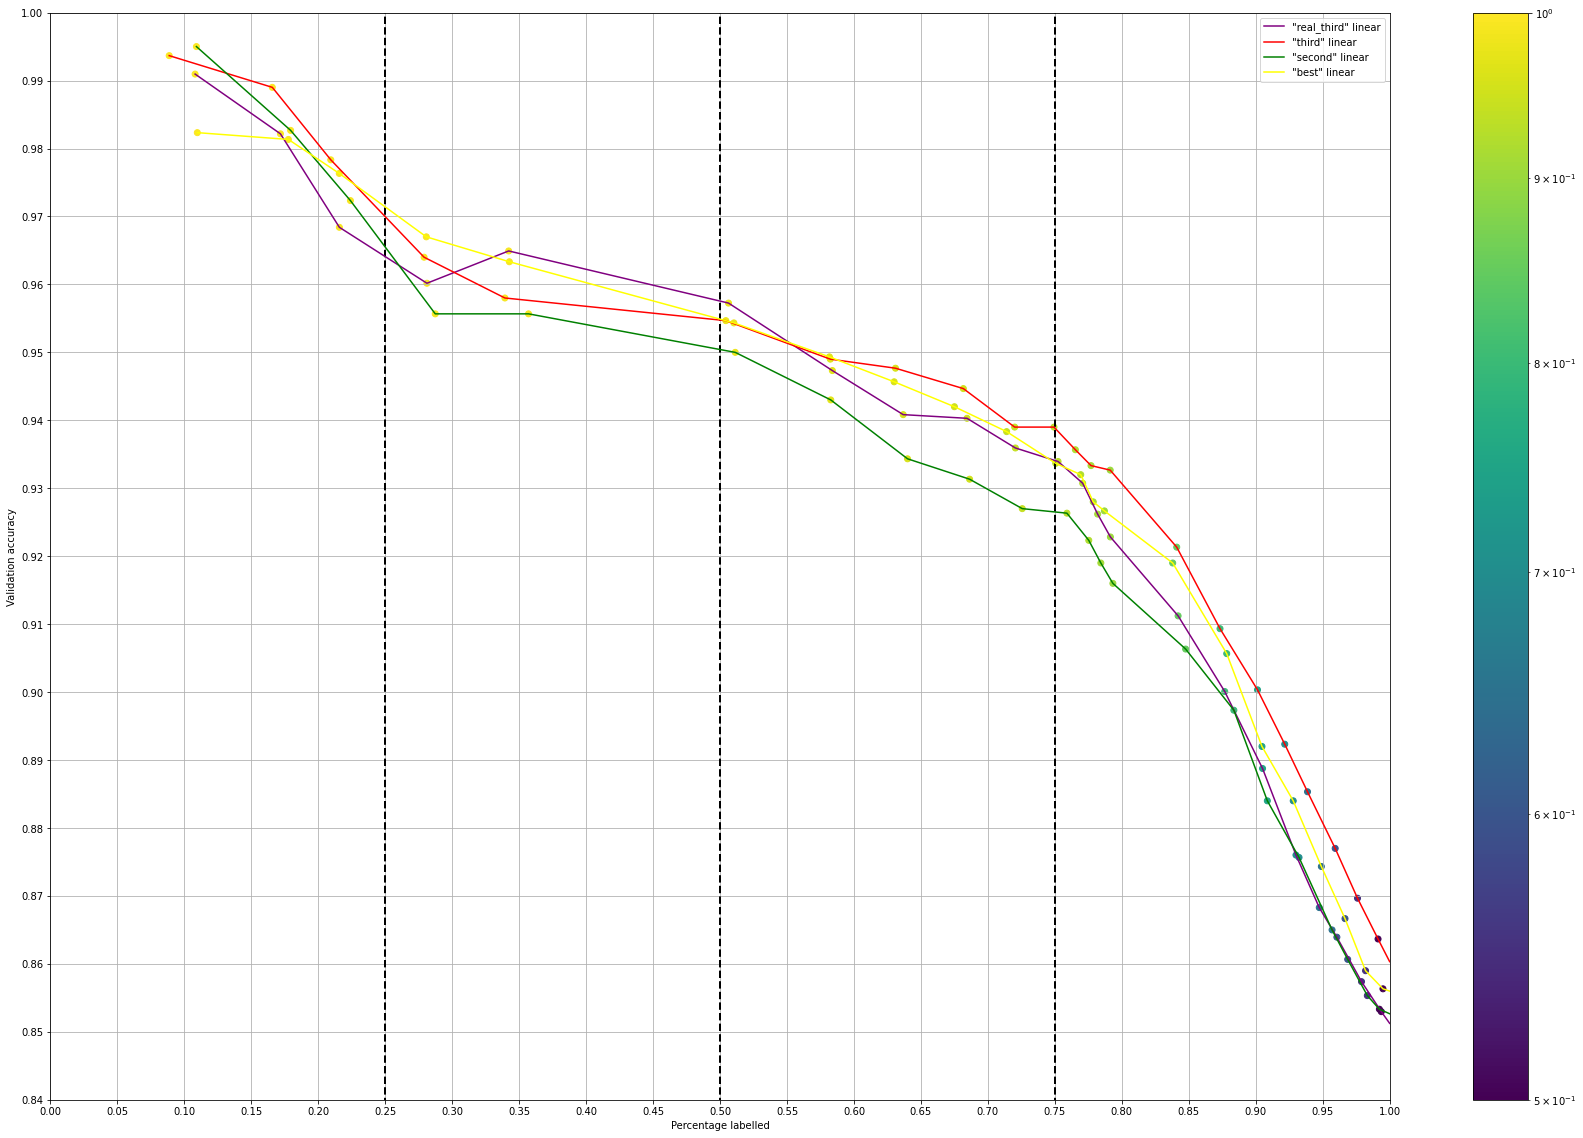

In [4]:
df1 = pd.read_csv("./oesch16_nur/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch16_nur/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch16_nur/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

#df = df[df.combi_model=="nn"]
#df = df[df.combi_model=="xgboost"]
df = df[df.combi_model=="linear"]

#df = df[df['Name'] == '"best"']
#df = df[df['Name'] == '"second"']
#df = df[df['Name'] == '"third"']
#df = df[df['Name'] == '"real_third"']


names = df.Name.values
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<(max-0.005):
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


plt.figure(figsize= (30,20))
for perc, acc, name, combi_mod, linecolor in zip(percentages, accuracies, names, combi_model, colors):
    #print(percentages)
    #for i, j, k in zip(perc, acc, confidences):
    plt.scatter(x=perc, y=acc, c=confidences, norm=matplotlib.colors.LogNorm(vmin=0.5, vmax=1.0))
    plt.plot(perc, acc, c=linecolor,  label = f"{name} {combi_mod}")
plt.colorbar()

plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((0.84, 1.0))
plt.grid()
plt.yticks(np.arange(0.84, 1.0, step=0.01))
plt.xticks(np.arange(0, 1.025, step=0.05))
plt.xlabel("Percentage labelled")
plt.ylabel("Validation accuracy")
plt.legend()
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
plt.show()

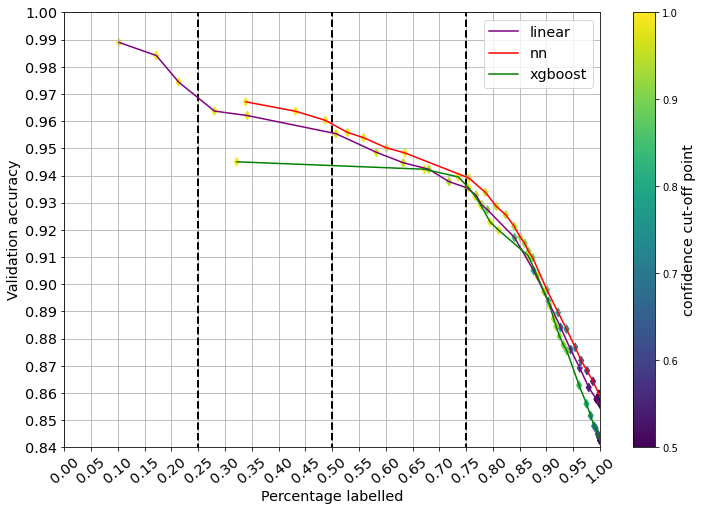

In [30]:
df1 = pd.read_csv("./oesch16_nur/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch16_nur/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch16_nur/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

df = df[df['Name'] != '"second"']

df = df.groupby(["combi_model"], as_index= False)[['confidence average @0.0.validation accuracy @0.0: ',
       'confidence average @0.5.percentage labelled @0.5: ',
       'confidence average @0.55.percentage labelled @0.55: ',
       'confidence average @0.6.percentage labelled @0.6: ',
       'confidence average @0.65.percentage labelled @0.65: ',
       'confidence average @0.7.percentage labelled @0.7: ',
       'confidence average @0.75.percentage labelled @0.75: ',
       'confidence average @0.8.percentage labelled @0.8: ',
       'confidence average @0.85.percentage labelled @0.85: ',
       'confidence average @0.9.percentage labelled @0.9: ',
       'confidence average @0.91.percentage labelled @0.91: ',
       'confidence average @0.92.percentage labelled @0.92: ',
       'confidence average @0.93.percentage labelled @0.93: ',
       'confidence average @0.94.percentage labelled @0.94: ',
       'confidence average @0.95.percentage labelled @0.95: ',
       'confidence average @0.96.percentage labelled @0.96: ',
       'confidence average @0.97.percentage labelled @0.97: ',
       'confidence average @0.98.percentage labelled @0.98: ',
       'confidence average @0.99.percentage labelled @0.99: ',
       'confidence average @0.992.percentage labelled @0.992: ',
       'confidence average @0.994.percentage labelled @0.994: ',
       'confidence average @0.995.percentage labelled @0.995: ',
       'confidence average @0.996.percentage labelled @0.996: ',
       'confidence average @0.997.percentage labelled @0.997: ',
       'confidence average @0.998.percentage labelled @0.998: ',
       'confidence average @0.999.percentage labelled @0.999: ',
       'confidence average @0.5.validation accuracy @0.5: ',
       'confidence average @0.55.validation accuracy @0.55: ',
       'confidence average @0.6.validation accuracy @0.6: ',
       'confidence average @0.65.validation accuracy @0.65: ',
       'confidence average @0.7.validation accuracy @0.7: ',
       'confidence average @0.75.validation accuracy @0.75: ',
       'confidence average @0.8.validation accuracy @0.8: ',
       'confidence average @0.85.validation accuracy @0.85: ',
       'confidence average @0.9.validation accuracy @0.9: ',
       'confidence average @0.91.validation accuracy @0.91: ',
       'confidence average @0.92.validation accuracy @0.92: ',
       'confidence average @0.93.validation accuracy @0.93: ',
       'confidence average @0.94.validation accuracy @0.94: ',
       'confidence average @0.95.validation accuracy @0.95: ',
       'confidence average @0.96.validation accuracy @0.96: ',
       'confidence average @0.97.validation accuracy @0.97: ',
       'confidence average @0.98.validation accuracy @0.98: ',
       'confidence average @0.99.validation accuracy @0.99: ',
       'confidence average @0.992.validation accuracy @0.992: ',
       'confidence average @0.994.validation accuracy @0.994: ',
       'confidence average @0.995.validation accuracy @0.995: ',
       'confidence average @0.996.validation accuracy @0.996: ',
       'confidence average @0.997.validation accuracy @0.997: ',
       'confidence average @0.998.validation accuracy @0.998: ',
       'confidence average @0.999.validation accuracy @0.999: ',
       'confidence average @0.0.percentage labelled @0.0: ']].mean()

#df = df[df.combi_model=="nn"] # hier third bestes
#df = df[df.combi_model=="xgboost"] # hier third bestes, aber später best bestes
#df = df[df.combi_model=="linear"] # hier third bestes

#df = df[df['Name'] == '"best"'] # laut optimization bestes modell
#df = df[df['Name'] == '"second"']
#df = df[df['Name'] == '"third"']
#df = df[df['Name'] == '"real_third"']


#names = df.Name.values
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<(max-0.01):
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


plt.figure(figsize= (12,8))
for perc, acc, name, combi_mod, linecolor in zip(percentages, accuracies, names, combi_model, colors):
    #print(percentages)
    #for i, j, k in zip(perc, acc, confidences):
    plt.scatter(x=perc, y=acc, c=confidences, vmin=0.5, vmax=1.0, marker = "d")
    plt.plot(perc, acc, c=linecolor,  label = f"{combi_mod}")
cbar = plt.colorbar()
cbar.set_label('confidence cut-off point',fontsize="x-large")

plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((0.84, 1.0))
plt.grid()
plt.yticks(np.arange(0.84, 1.0, step=0.01),fontsize="x-large")
plt.xticks(np.arange(0, 1.025, step=0.05),fontsize="x-large", rotation=40)
plt.xlabel("Percentage labelled",fontsize="x-large")
plt.ylabel("Validation accuracy",fontsize="x-large")
plt.legend(fontsize="x-large")
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
#plt.show()
plt.savefig('nur_16_conf.png')

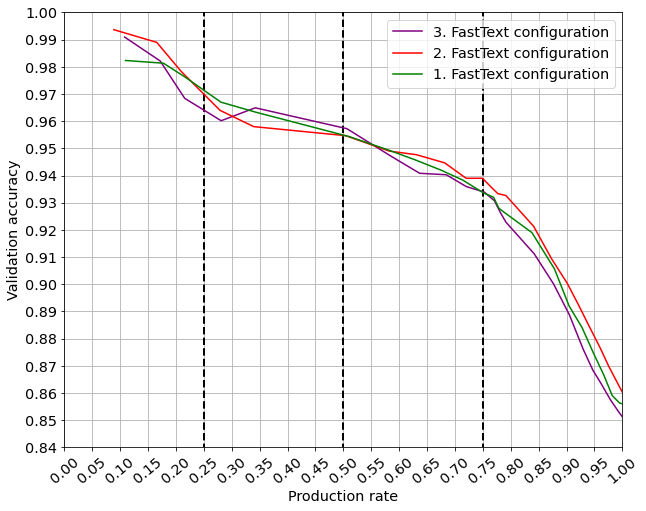

In [53]:
df1 = pd.read_csv("./oesch16_nur/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch16_nur/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch16_nur/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

df = df[df['Name'] != '"second"']


#df = df[df.combi_model=="nn"] # hier third bestes
#df = df[df.combi_model=="xgboost"] # hier third bestes, aber später best bestes
df = df[df.combi_model=="linear"] # hier third bestes

#df = df[df['Name'] == '"best"'] # laut optimization bestes modell
#df = df[df['Name'] == '"second"']
#df = df[df['Name'] == '"third"']
#df = df[df['Name'] == '"real_third"']

names = ["3. FastText configuration", "2. FastText configuration", "1. FastText configuration"]
#names = df.Name.values
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<(max-0.01):
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


plt.figure(figsize= (10,8))
for perc, acc, name, combi_mod, linecolor in zip(percentages, accuracies, names, combi_model, colors):
    #print(percentages)
    #for i, j, k in zip(perc, acc, confidences):
    #plt.scatter(x=perc, y=acc, c=confidences, vmin=0.5, vmax=1.0, marker = "d")
    plt.plot(perc, acc, c=linecolor,  label = f"{name}")
#cbar = plt.colorbar()
#cbar.set_label('confidence cut-off point',fontsize="x-large")

plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((0.84, 1.0))
plt.grid()
plt.yticks(np.arange(0.84, 1.0, step=0.01),fontsize="x-large")
plt.xticks(np.arange(0, 1.025, step=0.05),fontsize="x-large", rotation=40)
plt.xlabel("Production rate",fontsize="x-large")
plt.ylabel("Validation accuracy",fontsize="x-large")
plt.legend(fontsize="x-large")
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
#plt.show()
plt.savefig('nur_16_linear.png')

In [36]:
df1 = pd.read_csv("./oesch16_nur/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch16_nur/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch16_nur/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

df = df[df['Name'] != '"second"']

df = df.groupby(["combi_model"], as_index= False)[['confidence average @0.0.validation accuracy @0.0: ',
       'confidence average @0.5.percentage labelled @0.5: ',
       'confidence average @0.55.percentage labelled @0.55: ',
       'confidence average @0.6.percentage labelled @0.6: ',
       'confidence average @0.65.percentage labelled @0.65: ',
       'confidence average @0.7.percentage labelled @0.7: ',
       'confidence average @0.75.percentage labelled @0.75: ',
       'confidence average @0.8.percentage labelled @0.8: ',
       'confidence average @0.85.percentage labelled @0.85: ',
       'confidence average @0.9.percentage labelled @0.9: ',
       'confidence average @0.91.percentage labelled @0.91: ',
       'confidence average @0.92.percentage labelled @0.92: ',
       'confidence average @0.93.percentage labelled @0.93: ',
       'confidence average @0.94.percentage labelled @0.94: ',
       'confidence average @0.95.percentage labelled @0.95: ',
       'confidence average @0.96.percentage labelled @0.96: ',
       'confidence average @0.97.percentage labelled @0.97: ',
       'confidence average @0.98.percentage labelled @0.98: ',
       'confidence average @0.99.percentage labelled @0.99: ',
       'confidence average @0.992.percentage labelled @0.992: ',
       'confidence average @0.994.percentage labelled @0.994: ',
       'confidence average @0.995.percentage labelled @0.995: ',
       'confidence average @0.996.percentage labelled @0.996: ',
       'confidence average @0.997.percentage labelled @0.997: ',
       'confidence average @0.998.percentage labelled @0.998: ',
       'confidence average @0.999.percentage labelled @0.999: ',
       'confidence average @0.5.validation accuracy @0.5: ',
       'confidence average @0.55.validation accuracy @0.55: ',
       'confidence average @0.6.validation accuracy @0.6: ',
       'confidence average @0.65.validation accuracy @0.65: ',
       'confidence average @0.7.validation accuracy @0.7: ',
       'confidence average @0.75.validation accuracy @0.75: ',
       'confidence average @0.8.validation accuracy @0.8: ',
       'confidence average @0.85.validation accuracy @0.85: ',
       'confidence average @0.9.validation accuracy @0.9: ',
       'confidence average @0.91.validation accuracy @0.91: ',
       'confidence average @0.92.validation accuracy @0.92: ',
       'confidence average @0.93.validation accuracy @0.93: ',
       'confidence average @0.94.validation accuracy @0.94: ',
       'confidence average @0.95.validation accuracy @0.95: ',
       'confidence average @0.96.validation accuracy @0.96: ',
       'confidence average @0.97.validation accuracy @0.97: ',
       'confidence average @0.98.validation accuracy @0.98: ',
       'confidence average @0.99.validation accuracy @0.99: ',
       'confidence average @0.992.validation accuracy @0.992: ',
       'confidence average @0.994.validation accuracy @0.994: ',
       'confidence average @0.995.validation accuracy @0.995: ',
       'confidence average @0.996.validation accuracy @0.996: ',
       'confidence average @0.997.validation accuracy @0.997: ',
       'confidence average @0.998.validation accuracy @0.998: ',
       'confidence average @0.999.validation accuracy @0.999: ',
       'confidence average @0.0.percentage labelled @0.0: ']].mean()

#df = df[df.combi_model=="nn"] # hier third bestes
#df = df[df.combi_model=="xgboost"] # hier third bestes, aber später best bestes
#df = df[df.combi_model=="linear"] # hier third bestes

#df = df[df['Name'] == '"best"'] # laut optimization bestes modell
#df = df[df['Name'] == '"second"']
#df = df[df['Name'] == '"third"']
#df = df[df['Name'] == '"real_third"']


#names = df.Name.values
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<(max-0.01):
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]

d= pd.DataFrame(index= confidences)
for accu,perce, name in zip(accuracies,percentages, combi_model):
    b= pd.DataFrame(accu, index= confidences)
    c= pd.DataFrame(perce, index= confidences)
    d.insert(0, f"{name} accuracies", b)
    d.insert(0, f"{name} percentages", c)
    
    
d.head(50)

,xgboost percentages,xgboost accuracies,nn percentages,nn accuracies,linear percentages,linear accuracies
0.000,1.000000,0.842582,1.000000,0.858510,1.000000,0.855861
0.500,0.999890,0.842678,0.998116,0.859579,0.993366,0.857658
0.550,0.998116,0.843736,0.986943,0.864274,0.978996,0.862019
0.600,0.996017,0.844843,0.975768,0.868228,0.962198,0.869200
0.650,0.991929,0.847048,0.964811,0.871950,0.945037,0.875984
0.700,0.988941,0.847822,0.953646,0.876821,0.926570,0.884118
0.750,0.982629,0.851610,0.937607,0.883463,0.903699,0.893697
0.800,0.974776,0.856019,0.921796,0.889629,0.876176,0.905029
0.850,0.960979,0.862842,0.900908,0.897924,0.840342,0.917186
0.900,0.937963,0.875574,0.874250,0.909831,0.789939,0.927388


In [59]:
df1 = pd.read_csv("./oesch16_nur/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch16_nur/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch16_nur/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

df = df[df['Name'] != '"second"']


#df = df[df.combi_model=="nn"] # hier third bestes
#df = df[df.combi_model=="xgboost"] # hier third bestes, aber später best bestes
df = df[df.combi_model=="linear"] # hier third bestes

#df = df[df['Name'] == '"best"'] # laut optimization bestes modell
#df = df[df['Name'] == '"second"']
#df = df[df['Name'] == '"third"']
#df = df[df['Name'] == '"real_third"']


names = ["3. FastText configuration", "2. FastText configuration", "1. FastText configuration"]
#print(df.Name.values)
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<(max-0.01):
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]

d= pd.DataFrame(index= confidences)
for accu,perce, name in zip(accuracies,percentages, names):
    b= pd.DataFrame(accu, index= confidences)
    c= pd.DataFrame(perce, index= confidences)
    d.insert(0, f"{name} accuracies", b)
    d.insert(0, f"{name} percentages", c)
    
    
d.head(50)

,1. FastText configuration percentages,1. FastText configuration accuracies,2. FastText configuration percentages,2. FastText configuration accuracies,3. FastText configuration percentages,3. FastText configuration accuracies
0.000,1.000000,0.856000,1.000000,0.860333,1.000000,0.851250
0.500,0.995000,0.856333,0.991333,0.863667,0.993763,0.852973
0.550,0.982000,0.859000,0.976000,0.869667,0.978987,0.857390
0.600,0.966667,0.866667,0.959333,0.877000,0.960593,0.863933
0.650,0.949000,0.874333,0.938667,0.885333,0.947443,0.868287
0.700,0.928000,0.884000,0.921667,0.892333,0.930043,0.876020
0.750,0.904667,0.892000,0.901333,0.900333,0.905097,0.888757
0.800,0.878333,0.905667,0.873333,0.909333,0.876860,0.900087
0.850,0.838000,0.919000,0.841000,0.921333,0.842027,0.911223
0.900,0.787000,0.926667,0.791333,0.932667,0.791483,0.922830


In [40]:
df1 = pd.read_csv("./oesch16_nur/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch16_nur/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch16_nur/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

df = df[df['Name'] != '"second"']


#df = df[df.combi_model=="nn"] # hier third bestes
#df = df[df.combi_model=="xgboost"] # hier third bestes, aber später best bestes
df = df[df.combi_model=="linear"] # hier third bestes

#df = df[df['Name'] == '"best"'] # laut optimization bestes modell
#df = df[df['Name'] == '"second"']
#df = df[df['Name'] == '"third"']
#df = df[df['Name'] == '"real_third"']


names = df.Name.values
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<(max-0.01):
            accuracies[row][value] = 0.0
        else:
            max = accuracies[row][value]

for min in [0, 0.25,0.5,0.75,0.9]:
    result = []
    for i in range(len(accuracies)):
        perce = np.flip(percentages[i])
        #print(perce)
        accu = np.flip(accuracies[i])
        #print(accu)        
        z = np.interp(np.arange(min,1,step=0.01), perce, accu, left= 0.0).mean()
        #print(z)
        result.append(z)
    print(min)
    print(result)
    print(names)

0
[0.8839504390628927, 0.8999618426558063, 0.8821051366041683]
['"real_third"' '"third"' '"best"']
0.25
[0.9348546475977463, 0.9379387609473459, 0.9368432297764959]
['"real_third"' '"third"' '"best"']
0.5
[0.9213833983673199, 0.9273930304587259, 0.9241738627985661]
['"real_third"' '"third"' '"best"']
0.75
[0.8979431666560701, 0.9074948756234817, 0.9023510236728183]
['"real_third"' '"third"' '"best"']
0.9
[0.8709181862110953, 0.8826438762042972, 0.8758709876053941]
['"real_third"' '"third"' '"best"']


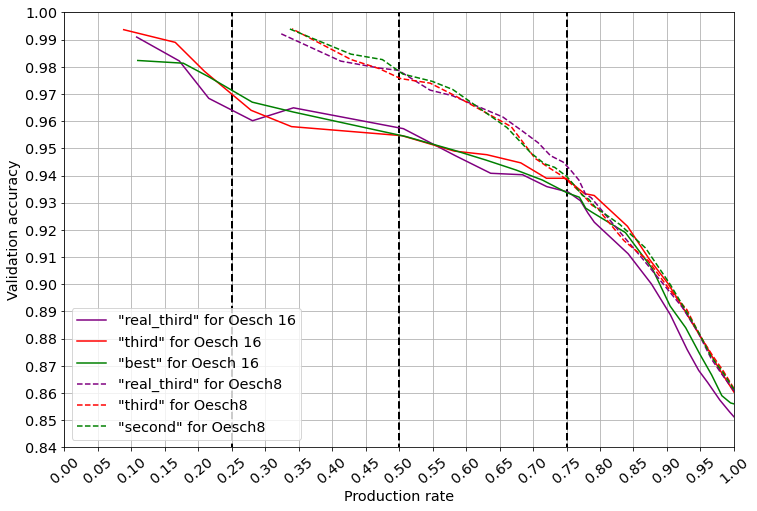

In [50]:
df1 = pd.read_csv("./oesch16_nur/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch16_nur/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch16_nur/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

#df = df[df.combi_model!="nn"] # am anfang second besser, ab 0.75 best besster # mit abstand am schlechtesten
#df = df[df.combi_model=="xgboost"] # second bestes
df = df[df.combi_model=="linear"] # am anfang second besser, später best besser

#df = df[df['Name'] == '"best"'] 
#df = df[df['Name'] == '"second"'] # das ist wie optimization gefunden hat bestes modell
df = df[df['Name'] != '"second"'] # das fliegt raus weil es nicht in top 3 war laut balanced acc
#df = df[df['Name'] == '"real_third"']

df11 = pd.read_csv("./oesch8_nur/nn.csv",  sep = ",")
df22 = pd.read_csv("./oesch8_nur/xgb.csv",  sep = ",")
df33 = pd.read_csv("./oesch8_nur/linear.csv",  sep = ",")
dfn = pd.concat([df11, df22, df33])
dfn= dfn.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
dfn['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

#df = df[df.combi_model=="nn"] # best minimal bestes # mit abstand am schlechtesten
#df = df[df.combi_model=="xgboost"] # second minimal bestes besonders später
dfn = dfn[dfn.combi_model=="linear"] # second minimal bestes

#dfn = dfn[dfn['Name'] == '"best"'] # laut optimization bestes modell
#df = df[df['Name'] == '"second"']
dfn = dfn[dfn['Name'] != '"best"'] # fliegt raus weil nicht in top 3
#df = df[df['Name'] == '"real_third"']

"""
def replace(x):
    #print(x)
    if x == "best":
        return "Oesch 8"
    if x == "second":
        return "Oesch16"
    else:
        return x


print(df.Name.apply(lambda x: replace(x)))
print(df)

names = df.Name.values"""

df = pd.concat([df, dfn])
#print(df)
#names = df.Names.values()
names = ["Oesch 16", "Oesch 16", "Oesch 16", "Oesch8", "Oesch8", "Oesch8"]
#combi_model= ["3. FastText configuration", "2. FastText configuration", "1. FastText configuration", "3. FastText configuration", "2. FastText configuration", "1. FastText configuration"]
combi_model = df.Name.values
#val_acc= df['combi average.combi validation accuracy'].values
#colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = ["purple", "red", "green", "purple", "red", "green"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()



for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<(max-0.01):
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]

lsse = ["-","-","-","--","--","--"]

plt.figure(figsize= (12,8))
for perc, acc, name, combi_mod, linecolor, ls in zip(percentages, accuracies, names, combi_model, colors, lsse):
    #print(percentages)
    #for i, j, k in zip(perc, acc, confidences):
    #plt.scatter(x=perc, y=acc, c=confidences, vmin=0.5, vmax=1.0, marker = "d")
    plt.plot(perc, acc, c=linecolor, ls = ls, label = f"{combi_mod} for {name}")
#cbar = plt.colorbar()
#cbar.set_label('confidence cut-off point',fontsize="x-large")

plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((0.84 , 1))
plt.grid()
plt.yticks(np.arange(0.84,1, step=0.01), fontsize="x-large")
plt.xticks(np.arange(0, 1.025, step=0.05), fontsize="x-large", rotation=40)
plt.xlabel("Production rate", fontsize="x-large")
plt.ylabel("Validation accuracy",fontsize="x-large")
plt.legend(fontsize="x-large")
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
#plt.show()
#plt.savefig('nur_configs.png')